<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [70]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [22]:
dataset.info()
#dataset.isnull().sum()
# отсутствующих значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [52]:
print('Колличество сделок по классам:\n',dataset['Class'].value_counts())

Колличество сделок по классам:
 0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 0, 'Количество сделок')

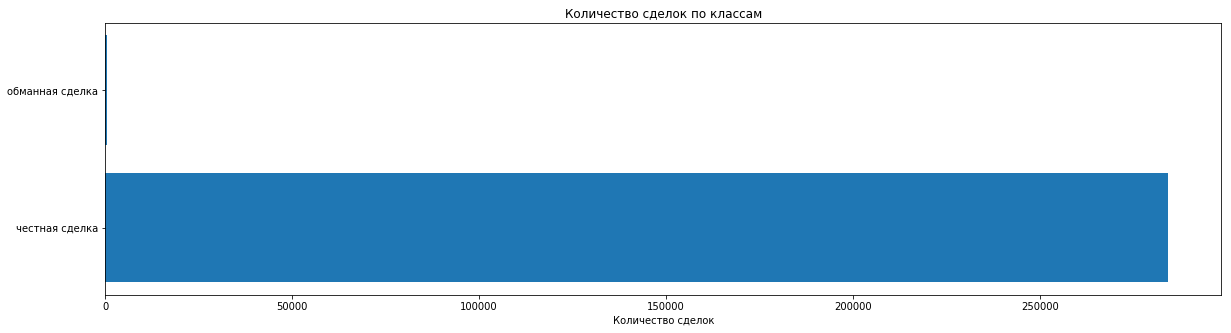

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.barh(['честная сделка','обманная сделка'], dataset.Class.value_counts())
plt.title('Количество сделок по классам')
plt.xlabel('Количество сделок')
#cnt.plot(kind='bar')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [56]:
dataset.groupby('Class').sum()['Amount']

Class
0    2.510246e+07
1    6.012797e+04
Name: Amount, dtype: float64

In [60]:
df_fraud = dataset[dataset.Class == 1]['Amount']
df_norm = dataset[dataset.Class == 0]['Amount']
print('В обманных операциях использовано', df_fraud.sum(), 'в нормальных операциях - ',  df_norm.sum())

В обманных операциях использовано 60127.97 в нормальных операциях -  25102462.04


Text(0.5, 0, 'Сумма')

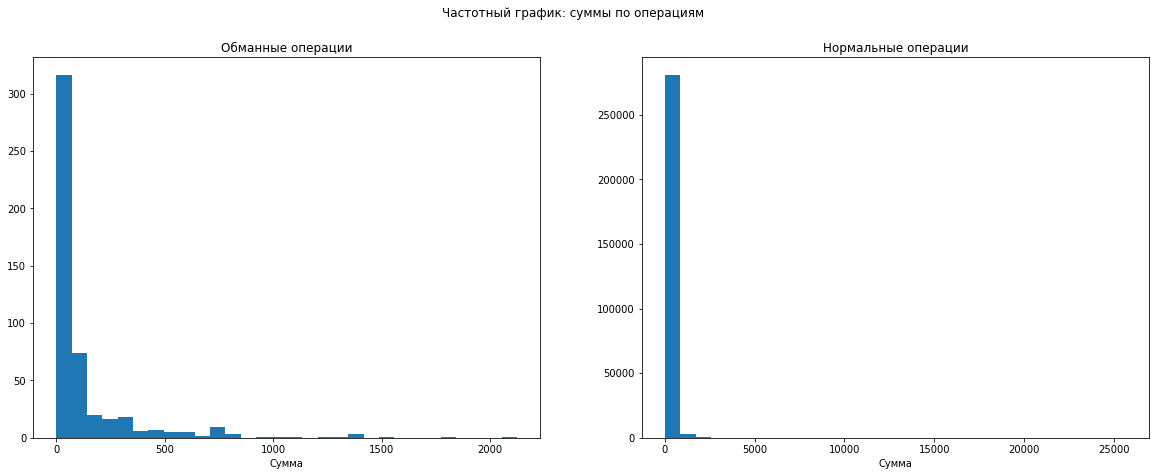

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 7))
ax1.hist(df_fraud, bins = 30)
ax2.hist(df_norm, bins = 30)

fig.suptitle('Частотный график: суммы по операциям')
ax1.set_title('Обманные операции')
ax2.set_title('Нормальные операции')
ax1.set_xlabel('Сумма')
ax2.set_xlabel('Сумма')

**5. Построить графики histograms для всех значений**

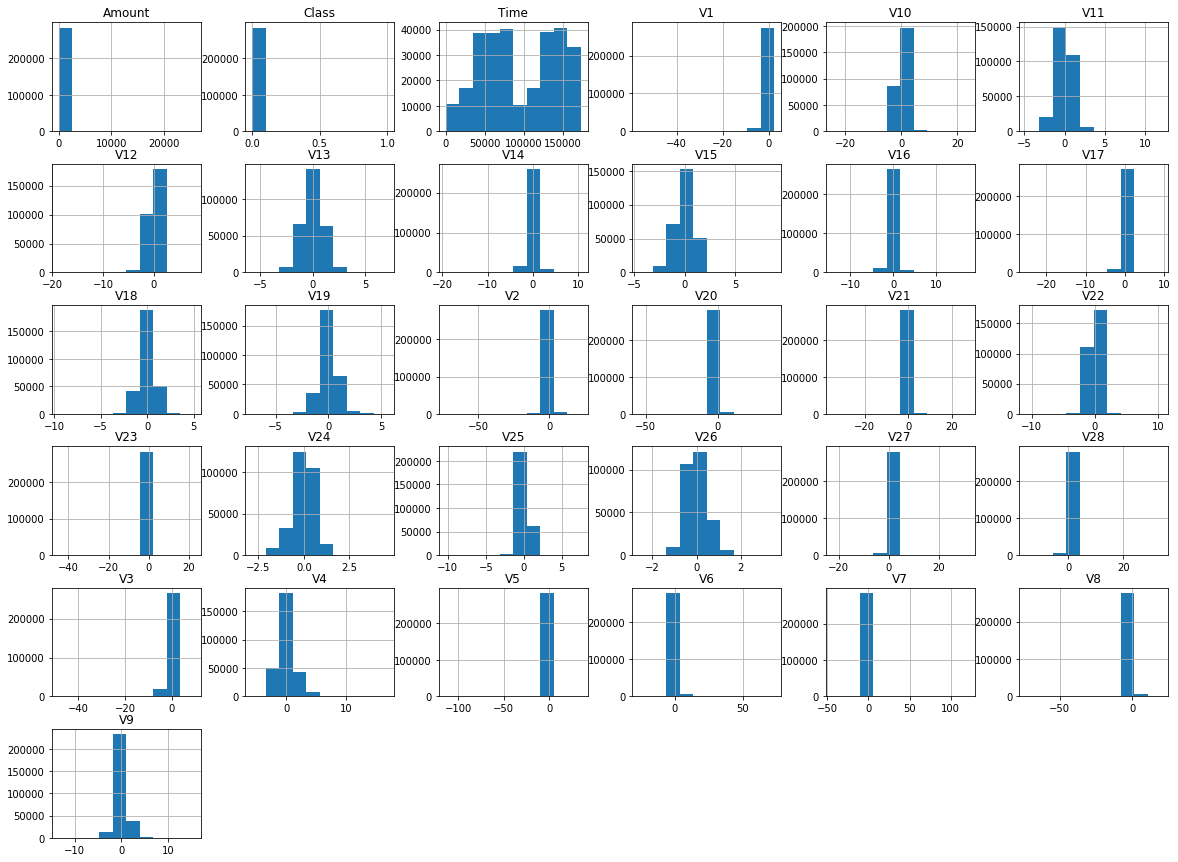

In [66]:
dataset.hist(figsize=(20,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

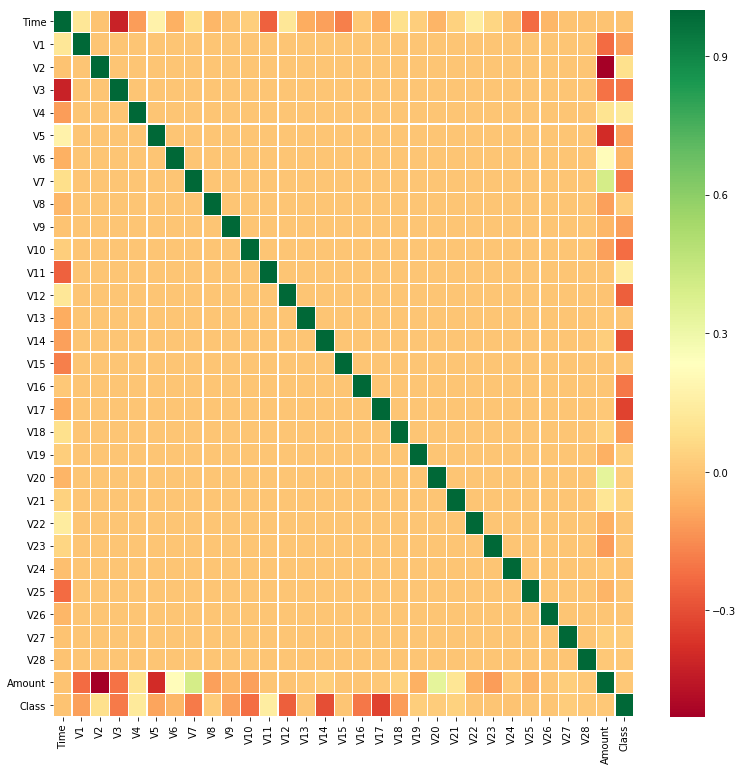

In [71]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [113]:
input_x = dataset.iloc[:,1:29] # данные для предсказания классов
output_y = dataset.iloc[:,-1]

In [88]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

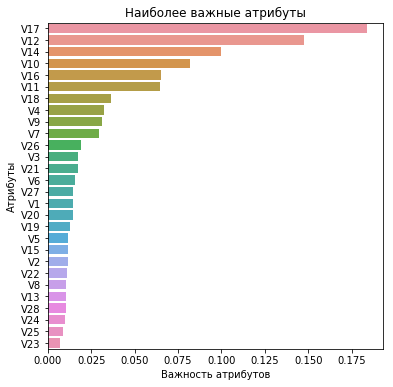

In [92]:

# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

Как делать classification report:

In [96]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.96      0.72      0.82       149

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



0.9994616293903538

Модель "рандомных деревьев" дала точность предсказания порядка 99%.

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [3]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [4]:
input_x = df_norm.iloc[:,1:29] # данные для предсказания классов
output_y = df_norm.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


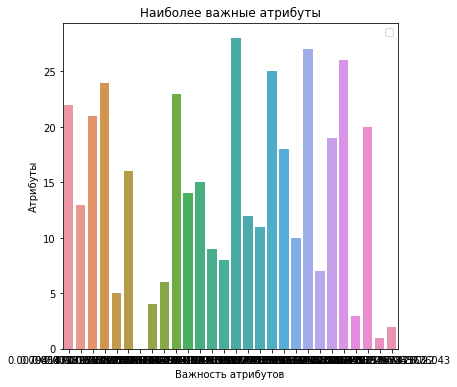

In [101]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [102]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     85301
         1.0       0.96      0.77      0.86       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995669627705019

Модель "рандомных деревьев" после нормализации данных дала точность предсказания порядка 99%.
Вывод: На данном наборе данных нормализация не дала особого эффекта

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [120]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\kostyaev\anaconda3\lib\site-packages (0.7.0)


In [14]:
x_train, x_test, y_train,y_test = train_test_split(df_norm,
                                                 output_y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [8]:
# увеличение количества тренировочных данных - UP-SAMPLING
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(x_train, y_train)
x_resampled, y_resampled = ros.fit_sample(x_train, y_train)
print('Количество элементов до операции:', len(x_train))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


In [9]:
# подтверждение уравнивания классов по количеству
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{-1.0: 199024, 1.0: 199024}

In [15]:
# создаем модель деревья решений
model3=RandomForestClassifier(n_estimators=100)

# обучаем модель
model3.fit(x_resampled, y_resampled)

#model_pred = model.predict(x_test)

#print(classification_report(y_test, model_pred))

#print(f'Модель "рандомных деревьев" по уравновешенным данным дала точность предсказания порядка {model2.score(x_test, y_test)}.')

RandomForestClassifier()

In [19]:
model_pred = model3.predict(x_test)

print(classification_report(y_test, model_pred))

model3.score(x_test, y_test)
print(f'Модель "рандомных деревьев" по уравновешенным данным дала точность предсказания порядка {model3.score(x_test, y_test)}.')

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     85291
         1.0       1.00      1.00      1.00       152

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

Модель "рандомных деревьев" по уравновешенным данным дала точность предсказания порядка 1.0.
